In [1]:
import pandas as pd
import seaborn as sns
import statistics as sts

In [2]:
#carregar arquivo de dados
dados = pd.read_csv('tempo.csv', sep = ';')
dados


,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [3]:
#explorar colunas numéricas
dados['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [4]:
dados['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [5]:
#tamanho do conjunto de dados
dados.shape

(14, 5)

In [6]:
#agrupando pela coluna aparencia
agrup = dados.groupby(['Aparencia']).size()
agrup

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

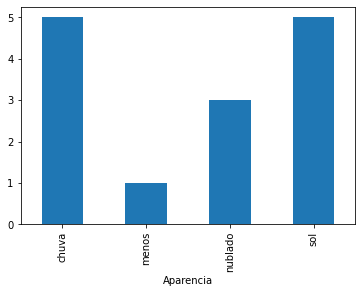

In [7]:
agrup.plot.bar('blue')

In [8]:
#agrupando por temperatura
agrup = dados.groupby(['Temperatura']).size()
agrup

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

In [9]:
#corrigindo valores fora do padrão na coluna aparencia
dados.loc[dados['Aparencia'].isin (['menos']), 'Aparencia']= 'chuva'
agrup = dados.groupby(['Aparencia']).size()
agrup

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

In [10]:
#corrigindo valores temperatura
mediana = sts.median(dados['Temperatura'])
mediana

73.5

In [11]:
#substituindo valores fora da faixa de 0 a 130 com a mediana da temperatura

dados.loc[(dados['Temperatura'] < 0) | (dados['Temperatura'] > 130), 'Temperatura'] = mediana


In [12]:
#checando a existencia de valores fora da faixa
dados.loc[(dados['Temperatura'] < 0) | (dados['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [13]:
#mediana umidade
medianau = sts.median(dados['Umidade'])
medianau

85.5

In [14]:
#substituindo valor fora da faixa de 0 a 100 de umidade pela mediana
dados.loc[(dados['Umidade'] < 0) | (dados['Umidade'] > 100), 'Umidade'] = medianau
#substituindo valores na pela mediana
dados['Umidade'].fillna(medianau, inplace = True)

#checando valores fora da faixa
dados.loc[(dados['Umidade'] < 0) | (dados['Umidade'] > 100)]
print('------')
#checando existencia de valores na
dados['Umidade'].isnull().sum()

------


0

In [15]:
#corrigindo valores faltantes na coluna vento pela moda falso
dados['Vento'].fillna('FALSO', inplace = True)

#checagem
dados['Vento'].isnull().sum()

0

In [16]:
dados

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,chuva,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,FALSO,sim
